In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


In [12]:
# Define column names based on dataset documentation
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", 
                "restecg", "thalach", "exang", "oldpeak", "slope", 
                "ca", "thal", "target"]

# Read the .data file with specified column names
df0 = pd.read_csv("data/processed.cleveland.data", names=column_names, header=None, na_values="?")
df1 = pd.read_csv("data/processed.hungarian.data", names=column_names, header=None, na_values="?")
df2 = pd.read_csv("data/processed.switzerland.data", names=column_names, header=None, na_values="?")
df3 = pd.read_csv("data/processed.va.data", names=column_names, header=None, na_values="?")

dfs = [df0, df1, df2, df3]

In [13]:
df3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
for df in dfs:
    print("Data shape:", df.shape)

Data shape: (303, 14)
Data shape: (294, 14)
Data shape: (123, 14)
Data shape: (200, 14)


In [15]:
df0.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [16]:
for df in dfs:
    for column in df.columns:
        n_nulls = df[column].isnull().sum()
        if n_nulls != 0:
            print(f"Column {column} has {n_nulls} null values")

    missing_percent = df.isnull().sum() / len(df) * 100
    print(missing_percent)   

Column ca has 4 null values
Column thal has 2 null values
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
target      0.000000
dtype: float64
Column trestbps has 1 null values
Column chol has 23 null values
Column fbs has 8 null values
Column restecg has 1 null values
Column thalach has 1 null values
Column exang has 1 null values
Column slope has 190 null values
Column ca has 291 null values
Column thal has 266 null values
age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.340136
chol         7.823129
fbs          2.721088
restecg      0.340136
thalach      0.340136
exang        0.340136
oldpeak      0.000000
slope       64.625850
ca          98.979592
thal        90.476190
target       0.000000
dtype: float64
Column trestbps has 2 nu

In [ ]:
# Handling missing values
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Encoding categorical variables
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()

# Scaling numerical features
scaler = StandardScaler()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num_impute', num_imputer, num_cols),
    ('cat_impute', cat_imputer, cat_cols),
    ('num_scale', scaler, num_cols),
    ('cat_encode', one_hot_encoder, cat_cols)
])

X = df0.drop(columns=['target'])
y = df0['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Print shape to confirm
print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (160, 43), Test set shape: (40, 43)


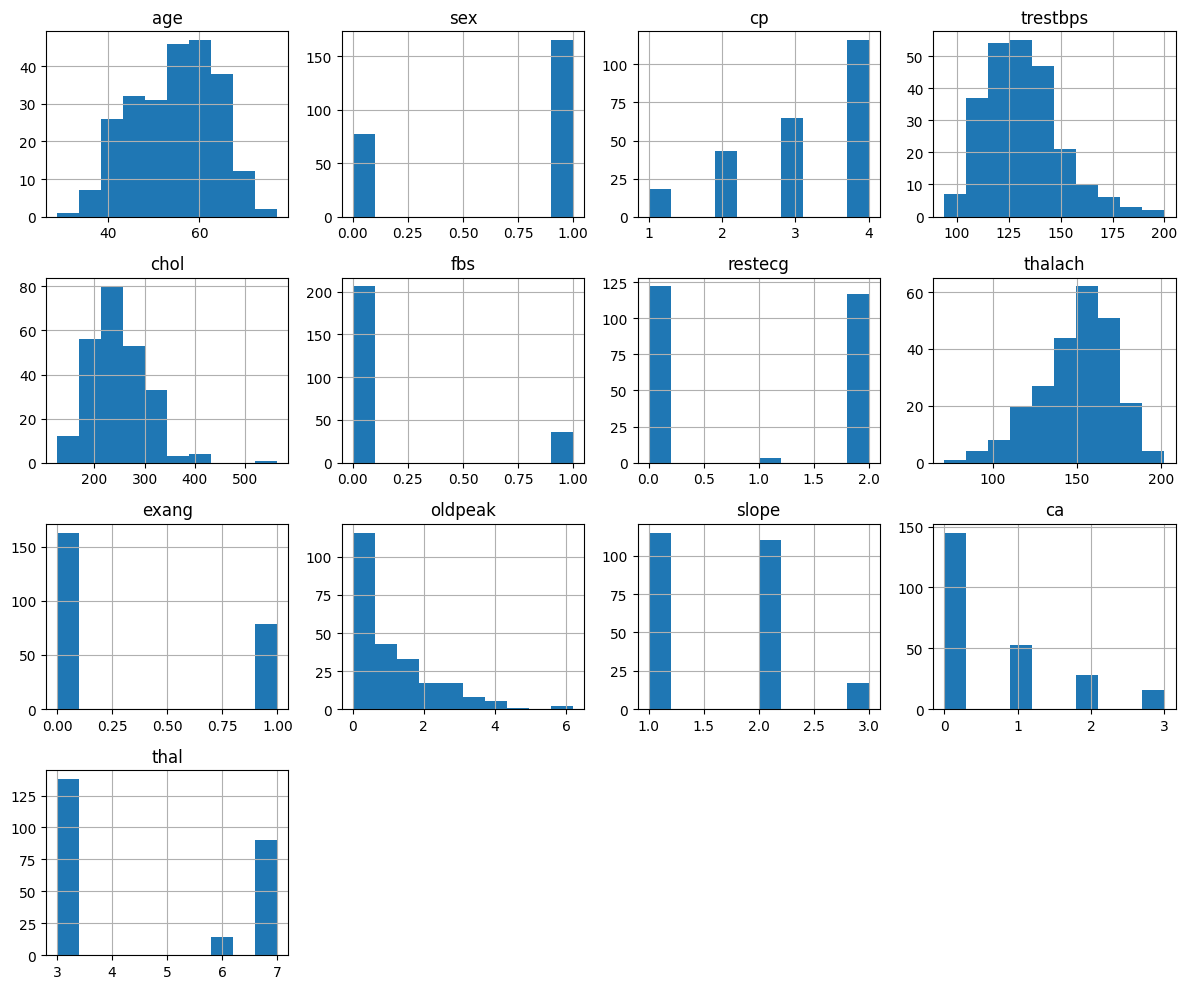

In [35]:
#Histogram
X_train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
## Second method for preprocessing

# Define column names based on dataset documentation
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", 
                "restecg", "thalach", "exang", "oldpeak", "slope", 
                "ca", "thal", "target"]

# Read the .data file with specified column names
df = pd.read_csv("data/processed.cleveland.data", names=column_names, header=None, na_values="?")

# Handle missing values by filling with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
# Define the preprocessing pipeline

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Split into train and test sets
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [26]:
X_train_transformed

array([[5.01727984e+00, 5.55682806e+00, 2.46490000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.94875989e+00, 5.77455155e+00, 3.31240000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.89034913e+00, 5.66642669e+00, 2.52810000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.83628191e+00, 5.61312811e+00, 2.31040000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.87519732e+00, 5.80211838e+00, 2.85610000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00394631e+00, 5.50125821e+00, 3.16840000e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

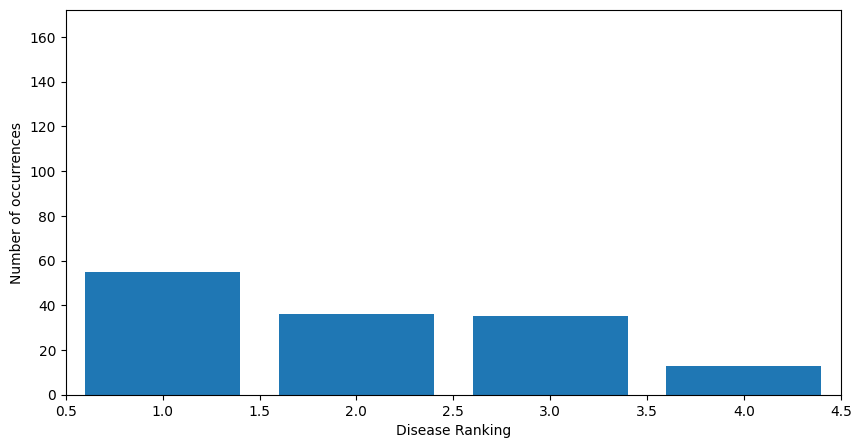

In [ ]:
label_dist = df["target"].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(label_dist.index, label_dist.values, width = 0.8)
plt.xlabel("Disease Ranking")
plt.ylabel("Number of occurrences")
#plt.xticks(rotation=90)
plt.xlim(0.5, len(label_dist) - 0.5)
plt.show()

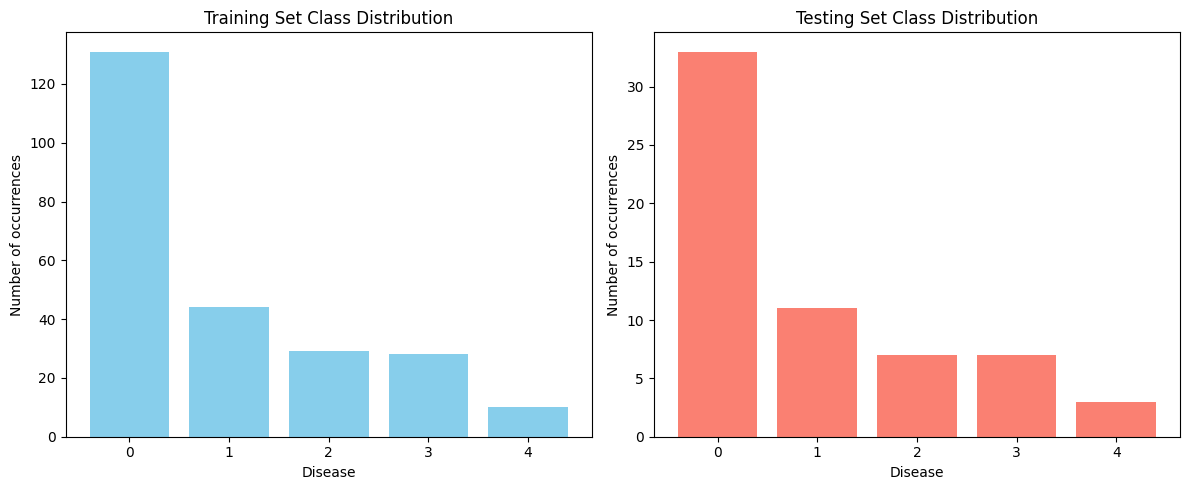

In [30]:
import matplotlib.pyplot as plt

# Get label distributions for training and testing sets
train_dist = y_train.value_counts()
test_dist = y_test.value_counts()

# Create side-by-side bar charts for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
axes[0].bar(train_dist.index, train_dist.values, width=0.8, color="skyblue")
axes[0].set_title("Training Set Class Distribution")
axes[0].set_xlabel("Disease")
axes[0].set_ylabel("Number of occurrences")
axes[0].set_xticks(train_dist.index)

# Testing set distribution
axes[1].bar(test_dist.index, test_dist.values, width=0.8, color="salmon")
axes[1].set_title("Testing Set Class Distribution")
axes[1].set_xlabel("Disease")
axes[1].set_ylabel("Number of occurrences")
axes[1].set_xticks(test_dist.index)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


https://www.statology.org/tetrachoric-correlation/

In [22]:
df.shape

(303, 14)

In [32]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

# find correlation between symptoms  
corr_matrix = df.drop(columns=["target"])

n_sample, n_feature = corr_matrix.shape
rff_all = []
for i in range(n_feature):
    for j in range(i + 1, n_feature):
        # Ensure i and j are valid indices
        if not (0 <= i < corr_matrix.shape[1]) or not (0 <= j < corr_matrix.shape[1]):
            raise IndexError("i or j is out of bounds")
        coeff_f_f = abs(matthews_corrcoef(corr_matrix.iloc[:, i], corr_matrix.iloc[:, j]))
        print(coeff_f_f)
        rff_all.append(coeff_f_f)
rff = np.mean(rff_all)

0.0
0.0
0.0
0.0
0.0
0.0
3.351524473737464e-05
0.0


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy: 0.5737704918032787
[[32  0  1  0  0]
 [ 7  0  2  2  0]
 [ 2  1  2  2  0]
 [ 1  4  1  1  0]
 [ 0  2  0  1  0]]


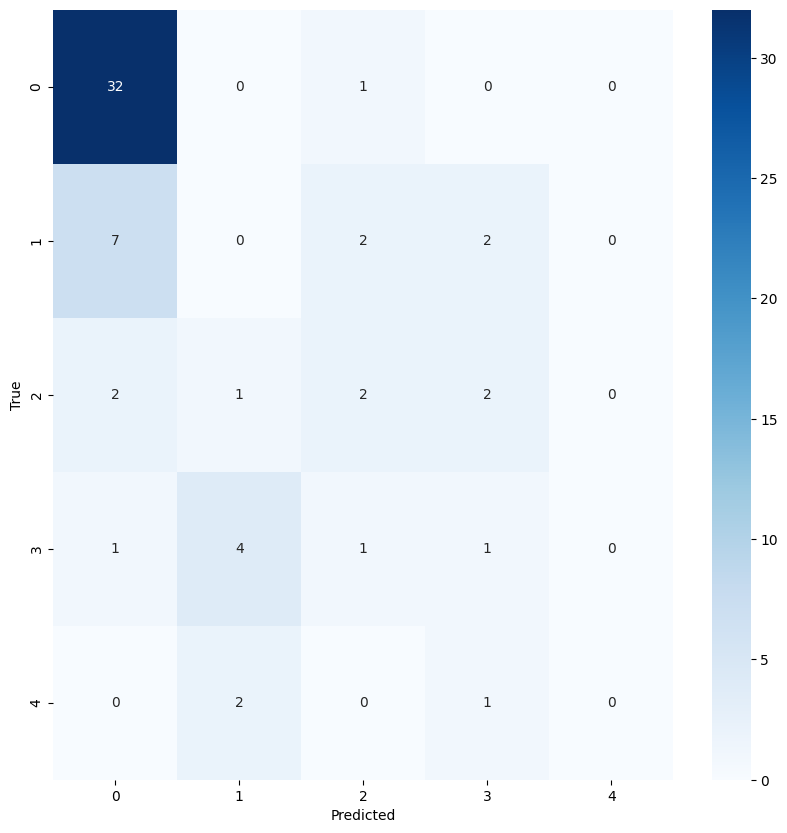

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()